### 批量梯度下降法Batch Gradient Descent
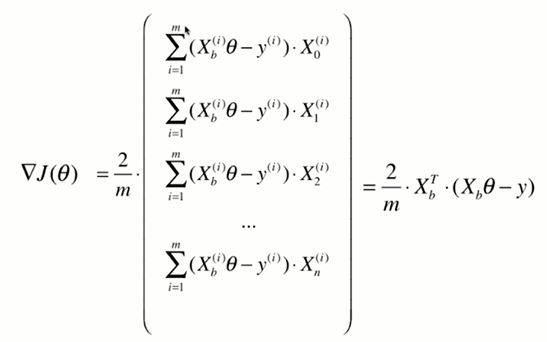

上面的前面除以m, 后面的m项相加，可以变换一下

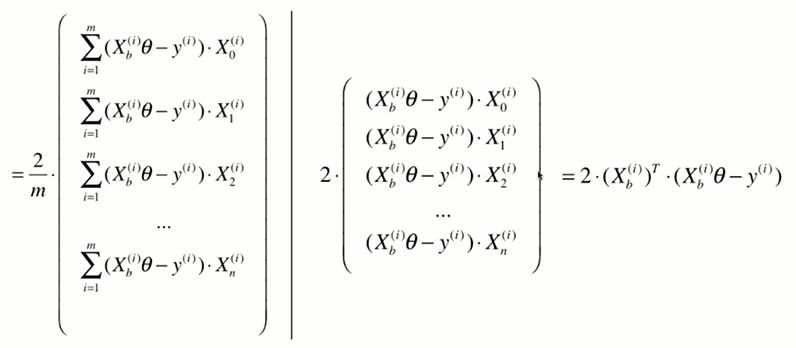

后面的这种形式，已经不是损失函数的梯度了，根据梯度，我们设想每次随机取出一个i,对于随机取出的i,这个式子也是一个向量，也可以表达一个方向，这样不断的迭代，也可以实现，即随机梯度想下降法的思想
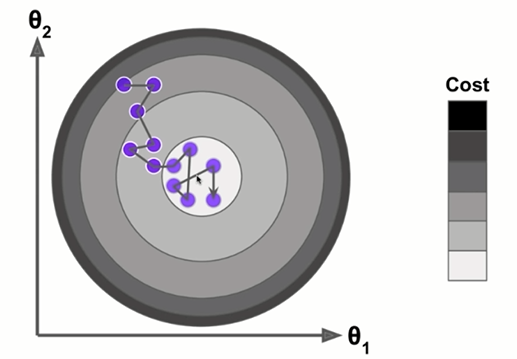

明显看出，它不会坚定不移的超一个方向去移动，但是最终还是会去地哦啊目的地

在上面这种情况下，学习率非常的重要, 所以在实际中，学习率是渐渐的递减的

可以使用下面这个函数
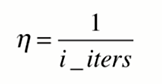

但是这个函数在实现的时候, 循环次数比较小的时候，下降速度太快，i+iters 从1到2一下变了50%，循环次数是10000 -> 10001，才想将了万分之一，差别太大了，需要在分母上添加b（默认50）
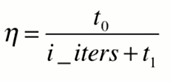
这样的话，就比较灵活了
经验取值，a =5, b =50
> 这就是在搜索领域当中一个非常火的算法模拟退火算法
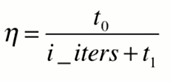

### 随机梯度下降法

In [1]:
import numpy as np


In [2]:
import matplotlib.pyplot as plt

随机生成一些数据·

In [3]:
m = 100000

x = np.random.normal(size=m)
X = x.reshape(-1, 1)
y = 4. * x + 3. + np.random.normal(0, 3, size=m)

In [4]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta)) ** 2) / len(y)
    except:
        return float("inf")

In [5]:
def dJ(theta, X_b, y):
    return X_b.T.dot(X_b.dot(theta) - y) * 2. / len(y)

批量梯队下降

In [6]:
def gradient_descent(X_b, y, initial_theta, eta, n_iters=1e4,epsilon = 1e-4):
    theta = initial_theta
    cur_iter = 0
    
    while cur_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        
        if(abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
        cur_iter += 1
    
    return theta

In [7]:
%%time
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])

eta = 0.01
theta = gradient_descent(X_b, y, initial_theta, eta)

Wall time: 666 ms


In [8]:
theta

array([2.95969523, 3.98209019])

### 使用随机梯度下降法

只对某一列进行数据处理

In [9]:
def dJ_sgd(theta, X_b_i, y_i):
    return X_b_i.T.dot(X_b_i.dot(theta) - y_i) * 2. 

In [10]:
def sgd(X_b, y, inital_theta, n_iters):
    # 这里的学习率不需要传入，是用过前面的式子进行九三得到的
    t0 = 5
    t1 = 50
    
    # 定义一个学习率的函数
    def learing_rate(t):
        return t0 / (t + t1)
    
    theta = initial_theta
    for cur_iter in range(n_iters):
        rand_i = np.random.randint(len(X_b))
        gradient = dJ_sgd(theta, X_b[rand_i], y[rand_i])
        theta = theta - learing_rate(cur_iter) * gradient
    return theta

### 测试随机梯度下降

In [11]:
%%time
X_b = np.hstack([np.ones((len(X), 1)) , X])
initial_theta = np.zeros(X_b.shape[1])
theta = sgd(X_b, y, initial_theta, n_iters=len(X_b) // 3)

Wall time: 611 ms


In [12]:
theta

array([3.01399845, 4.0895053 ])